In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [7]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2)+0.2*torch.rand(x.size())  #first part is the line space. second part is the noise

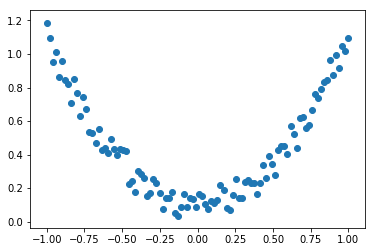

In [10]:
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [12]:
class Network(nn.Module):
    def __init__(self, A, B, C):
        super().__init__()
        self.fc1 = nn.Linear(in_features=A, out_features=B)
        self.fc2 = nn.Linear(in_features=B, out_features=C)
    
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [15]:
network = Network(1,10,1)
print(network)

Network(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


<IPython.core.display.Javascript object>


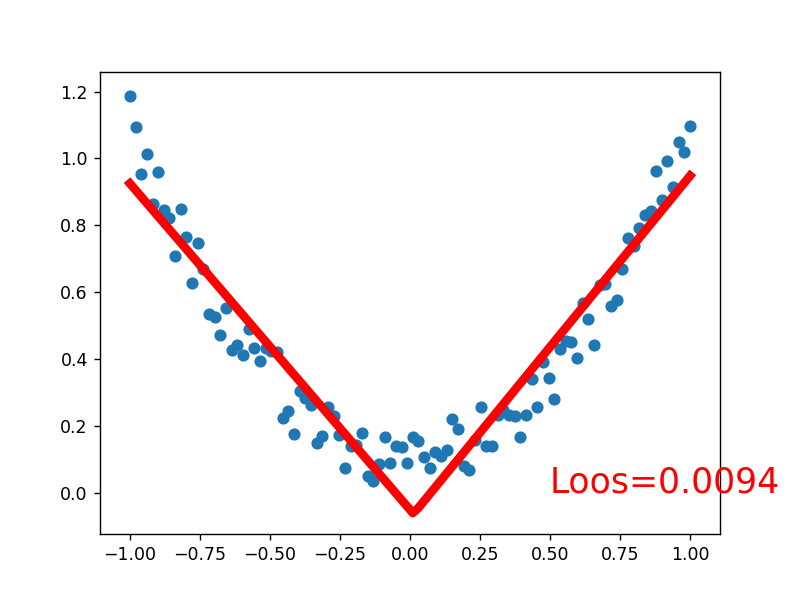

In [19]:
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)
loss_func = nn.MSELoss()

plt.ion()  #实现实时打印
plt.show()
#%matplotlib notebook

for t in range(100):
    prediction = network(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%5==0:
        plt.cla() #清除当前图像上的操作
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5, 0, 'Loos=%.4f'%loss.data, fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()
    